In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [15]:
heart = pd.read_csv("heart_2020_cleaned.csv")

In [16]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [17]:
heart.replace("Yes", 1, inplace = True)
heart.replace("No", 0, inplace = True)
heart["Sex"].replace("Male", 1, inplace = True)
heart["Sex"].replace("Female", 0, inplace = True)

#heart["Sex"] = np.where(heart["Sex"].str.contains("Male"), 1, 0)

heart["GenHealth"].replace("Poor", 1, inplace = True)
heart["GenHealth"].replace("Fair", 2, inplace = True)
heart["GenHealth"].replace("Good", 3, inplace = True)
heart["GenHealth"].replace("Very good", 4, inplace = True)
heart["GenHealth"].replace("Excellent", 5, inplace = True)

heart["Diabetic"].replace("No", 0, inplace = True)
heart["Diabetic"].replace("No, borderline diabetes", 0, inplace = True)
heart["Diabetic"].replace("Yes", 1, inplace = True)
heart["Diabetic"].replace("Yes (during pregnancy)", 1, inplace = True)

heart["AgeCategory"].replace("18-24", 1, inplace = True)
heart["AgeCategory"].replace("25-29", 2, inplace = True)
heart["AgeCategory"].replace("30-34", 3, inplace = True)
heart["AgeCategory"].replace("35-39", 4, inplace = True)
heart["AgeCategory"].replace("40-44", 5, inplace = True)
heart["AgeCategory"].replace("45-49", 6, inplace = True)
heart["AgeCategory"].replace("50-54", 7, inplace = True)
heart["AgeCategory"].replace("55-59", 8, inplace = True)
heart["AgeCategory"].replace("60-64", 9, inplace = True)
heart["AgeCategory"].replace("65-69", 10, inplace = True)
heart["AgeCategory"].replace("70-74", 11, inplace = True)
heart["AgeCategory"].replace("75-79", 12, inplace = True)
heart["AgeCategory"].replace("80 or older", 13, inplace = True)

In [18]:
heart.drop(['Race', 'PhysicalHealth', 'MentalHealth'], axis = 1, inplace = True)

In [19]:
heart['SleepTime'] = heart['SleepTime'].astype(int)

In [20]:
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,0,8,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,13,0,1,4,7,0,0,0
2,0,26.58,1,0,0,0,1,10,1,1,2,8,1,0,0
3,0,24.21,0,0,0,0,0,12,0,0,3,6,0,0,1
4,0,23.71,0,0,0,1,0,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,1,1,9,1,0,2,6,1,0,0
319791,0,29.84,1,0,0,0,1,4,0,1,4,5,1,0,0
319792,0,24.24,0,0,0,0,0,6,0,1,3,6,0,0,0
319793,0,32.81,0,0,0,0,0,2,0,0,3,12,0,0,0


In [22]:
y=np.array(heart.iloc[:,0])
X=np.array(heart.iloc[:,1:-1])

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X,y)

In [24]:
# Split into train/test
X_train_b, X_test_b, y_train, y_test =  train_test_split(X_over, y_over,test_size = 0.25, random_state = 42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))

minmax.fit(X_train_b)

X_train = minmax.transform(X_train_b)
X_test = minmax.transform(X_test_b)

In [26]:
model = Sequential()

model.add(Dense(units=1024, activation='relu',input_dim=X_train[0].shape[0]))

model.add(Dense(units = 512,activation='relu'))

model.add(Dense(units = 256,activation='relu'))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=["accuracy"])

model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=100, batch_size = 1024)

Epoch 1/100
429/429 - 12s - loss: 0.6438 - accuracy: 0.7118 - val_loss: 0.5889 - val_accuracy: 0.7354 - 12s/epoch - 27ms/step
Epoch 2/100
429/429 - 11s - loss: 0.5451 - accuracy: 0.7454 - val_loss: 0.5171 - val_accuracy: 0.7535 - 11s/epoch - 26ms/step
Epoch 3/100
429/429 - 11s - loss: 0.5033 - accuracy: 0.7598 - val_loss: 0.4962 - val_accuracy: 0.7643 - 11s/epoch - 26ms/step
Epoch 4/100
429/429 - 11s - loss: 0.4917 - accuracy: 0.7662 - val_loss: 0.4905 - val_accuracy: 0.7683 - 11s/epoch - 27ms/step
Epoch 5/100
429/429 - 11s - loss: 0.4885 - accuracy: 0.7685 - val_loss: 0.4885 - val_accuracy: 0.7701 - 11s/epoch - 25ms/step
Epoch 6/100
429/429 - 11s - loss: 0.4870 - accuracy: 0.7696 - val_loss: 0.4873 - val_accuracy: 0.7707 - 11s/epoch - 26ms/step
Epoch 7/100
429/429 - 11s - loss: 0.4858 - accuracy: 0.7701 - val_loss: 0.4861 - val_accuracy: 0.7716 - 11s/epoch - 26ms/step
Epoch 8/100
429/429 - 11s - loss: 0.4848 - accuracy: 0.7707 - val_loss: 0.4852 - val_accuracy: 0.7722 - 11s/epoch - 26

In [27]:
pred = model.predict(X_test)
y_test_pred = np.round(pred).flatten()

4570/4570 [==============================] - 8s 2ms/step


In [34]:
from sklearn.metrics import roc_curve, auc
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

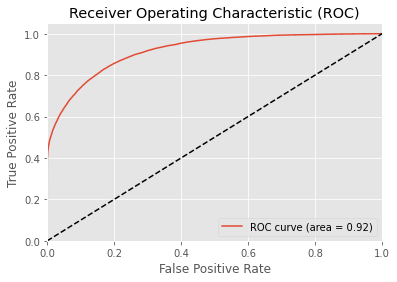

In [35]:
plot_roc(pred,y_test)

In [36]:
y_test_pred = np.round(model.predict(X_test)).flatten()

4570/4570 [==============================] - 10s 2ms/step


In [37]:
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
print(my_matrix)

print("True Pos is:", my_matrix[1, 1])
print("True Neg is:", my_matrix[0, 0])
print("False Pos is:", my_matrix[0, 1])
print("False Neg is:", my_matrix[1, 0]) 

[[71178  1934]
 [31394 41705]]
True Pos is: 41705
True Neg is: 71178
False Pos is: 1934
False Neg is: 31394


In [38]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('Specificity score:',  round(my_matrix[0, 0]/(my_matrix[0, 0] + my_matrix[0, 1]),4))

Precision score: 0.9557
Recall score: 0.5705
Accuracy score: 0.7721
F1 score: 0.7145
Specificity score: 0.9735
